In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
land_cost=np.load('land_cost_data.npy')
availability=np.load('land_availability_data.npy')
terrain_solar=np.load('solar_terrain_data.npy')

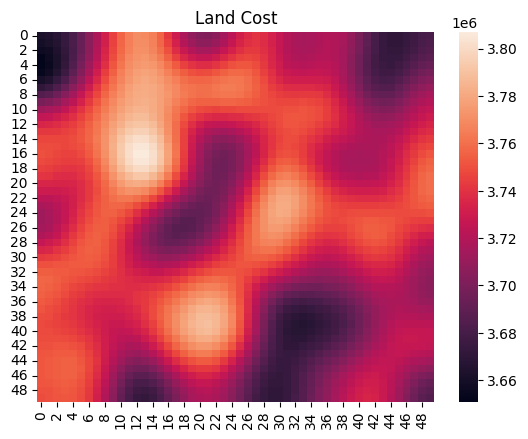

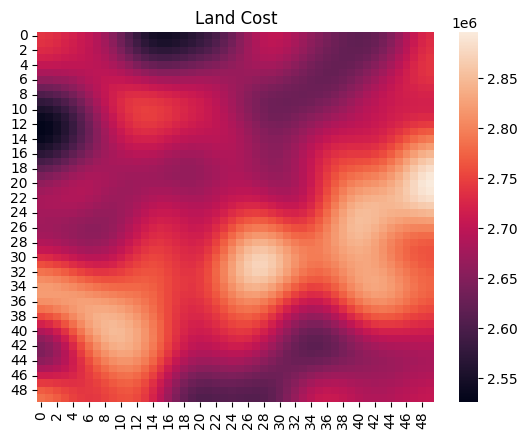

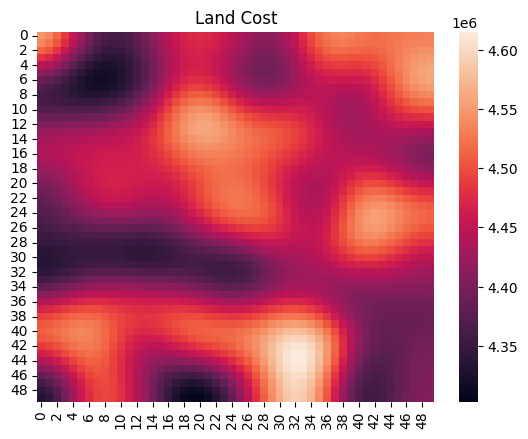

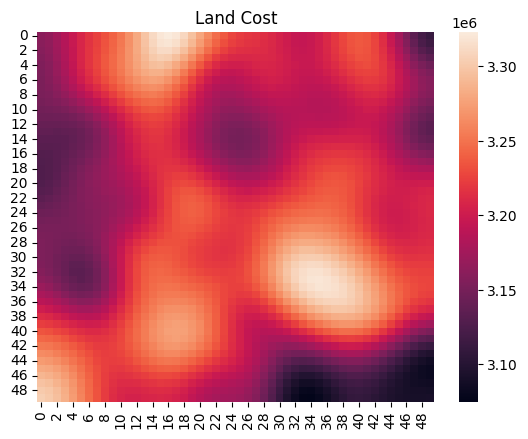

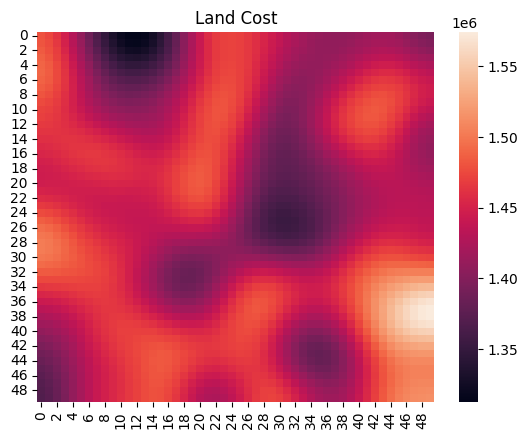

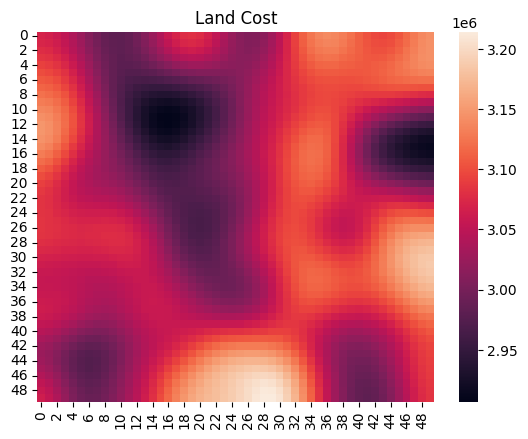

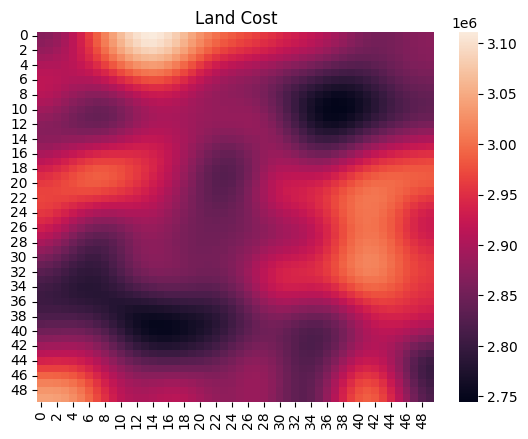

In [3]:
[a,lat,long]=np.shape(land_cost)
loc=7
setup_cost_solar=np.zeros((loc,lat,long))
for i in range(loc):
    sns.heatmap(land_cost[i,:,:])
    plt.title('Land Cost')
    plt.show()

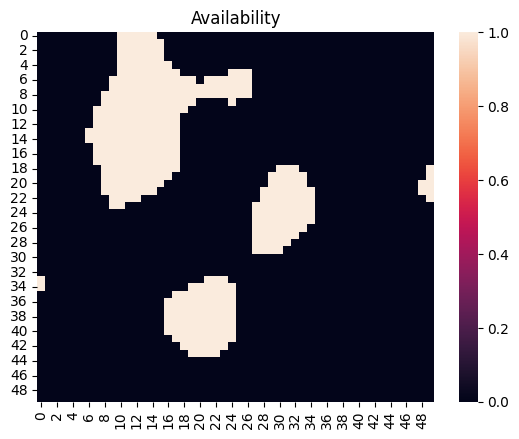

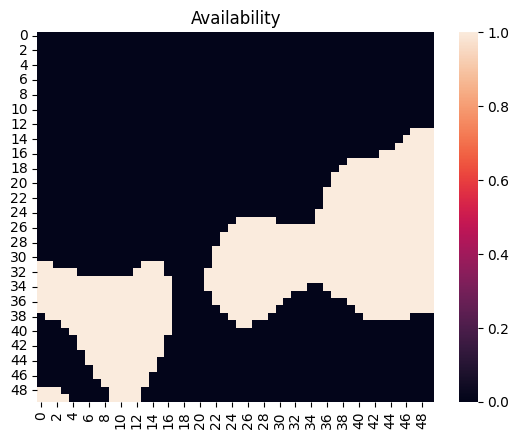

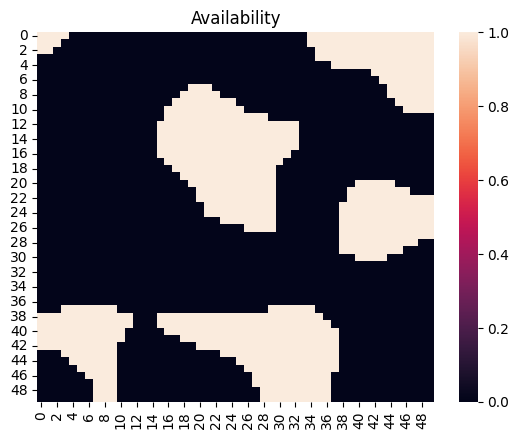

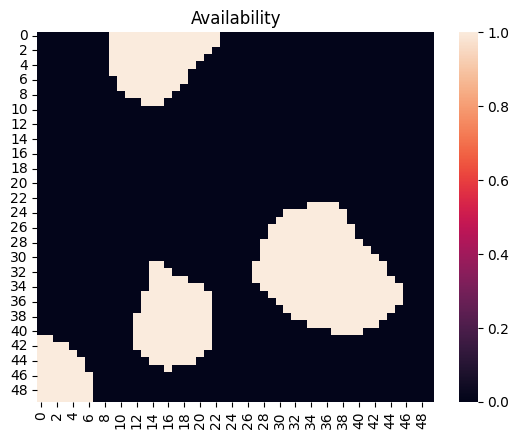

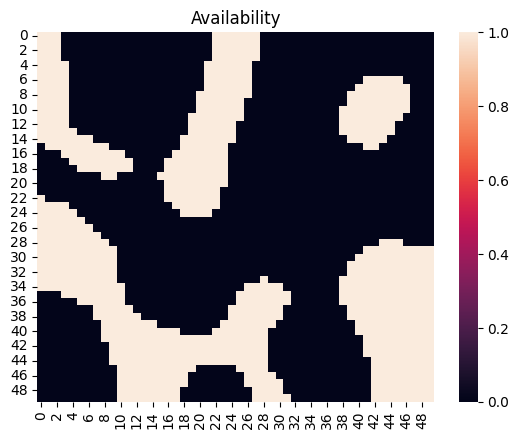

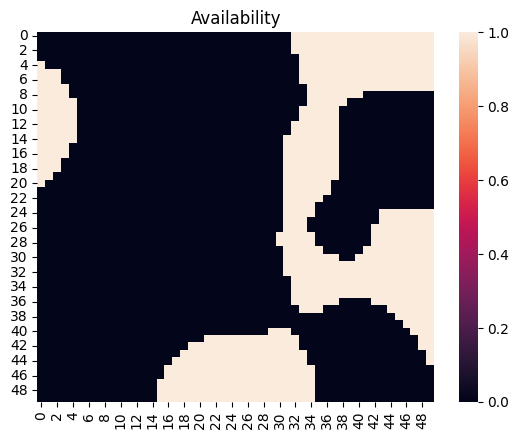

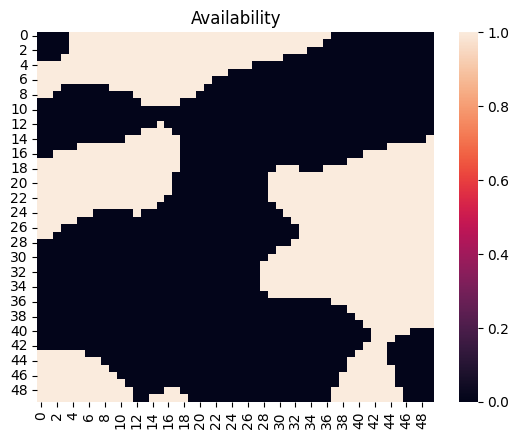

In [23]:
area=np.zeros(loc)
for i in range(loc):
    sns.heatmap(availability[i,:,:])
    area[i]=np.sum(availability[i,:,:])
    plt.title('Availability')
    plt.show()

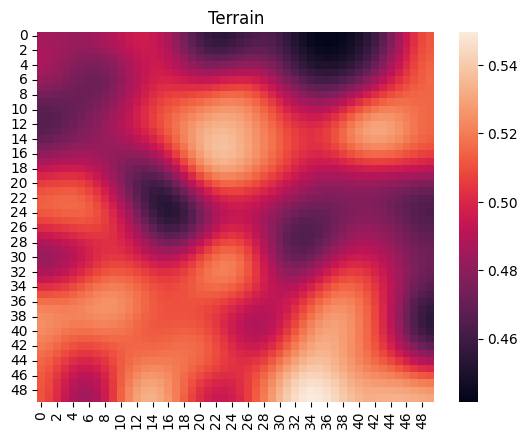

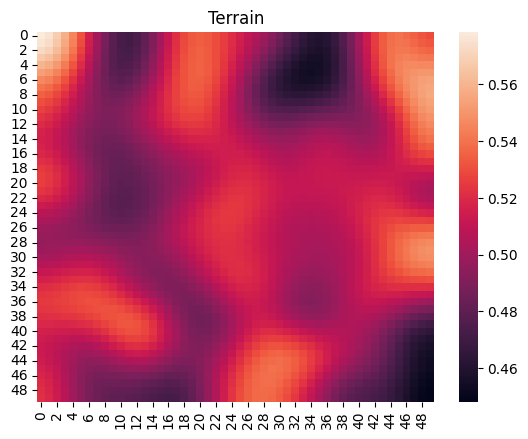

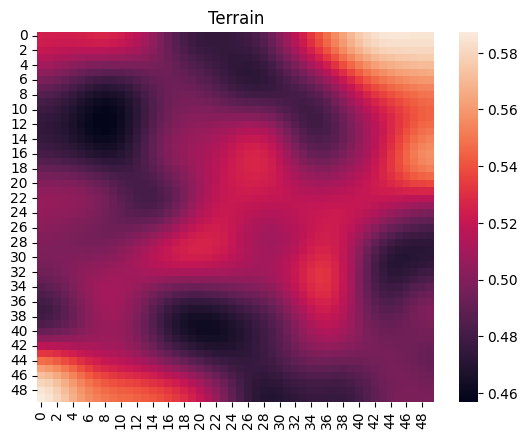

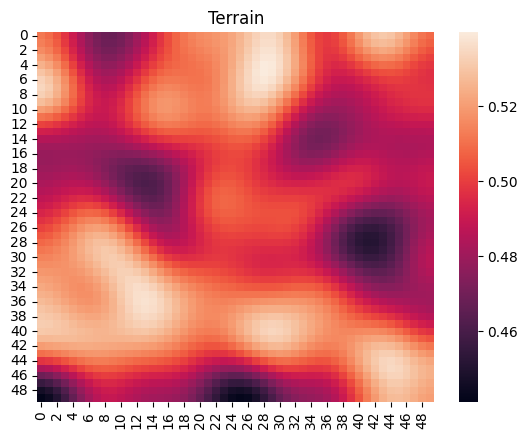

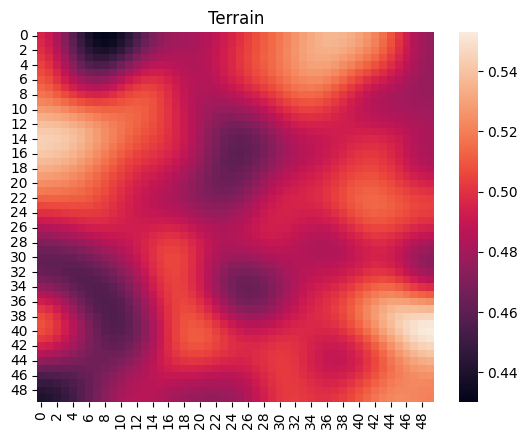

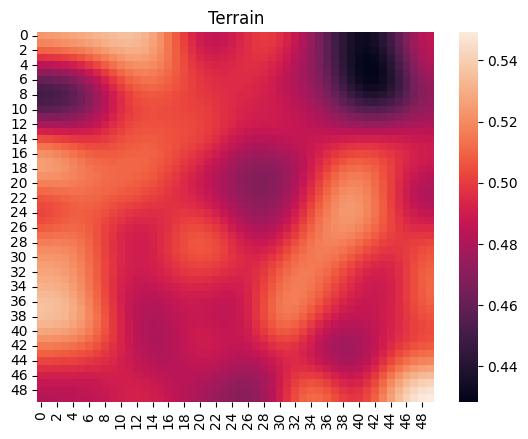

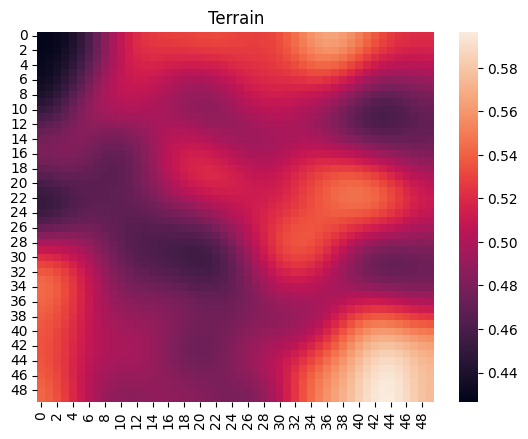

In [24]:
for i in range(loc):
    sns.heatmap(terrain_solar[i,:,:])
    plt.title('Terrain')
    plt.show()

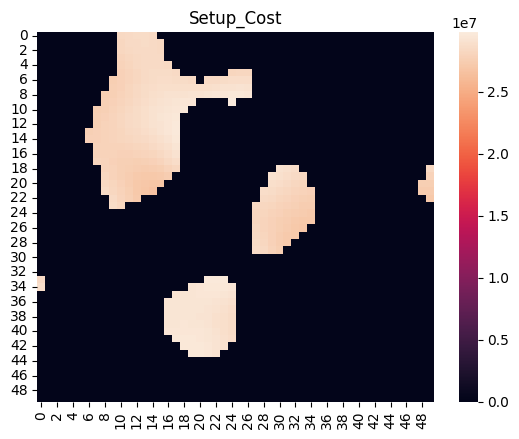

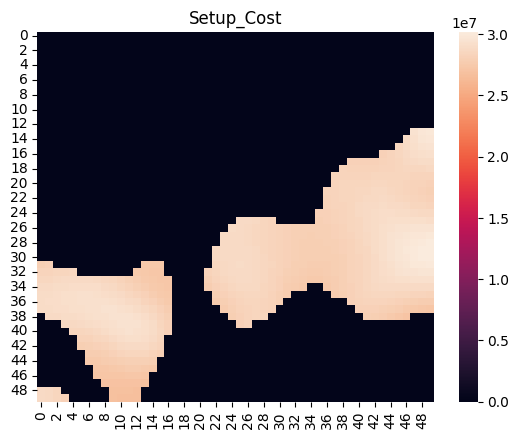

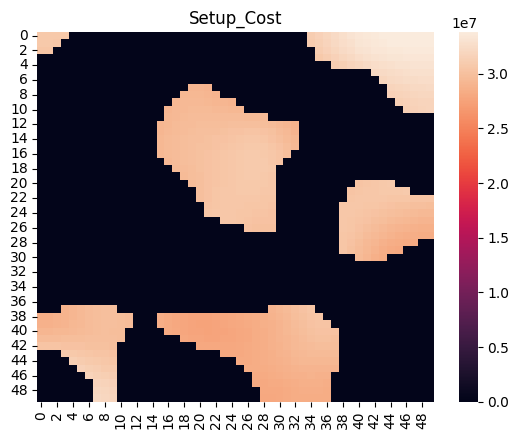

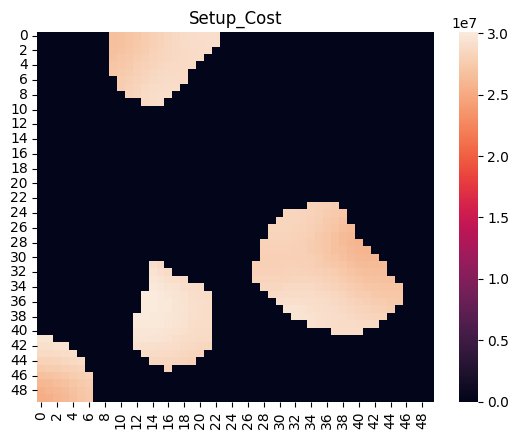

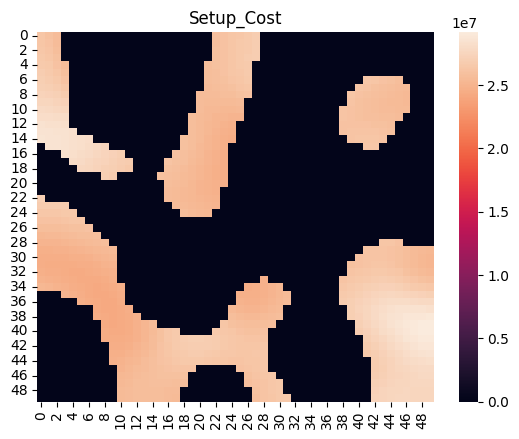

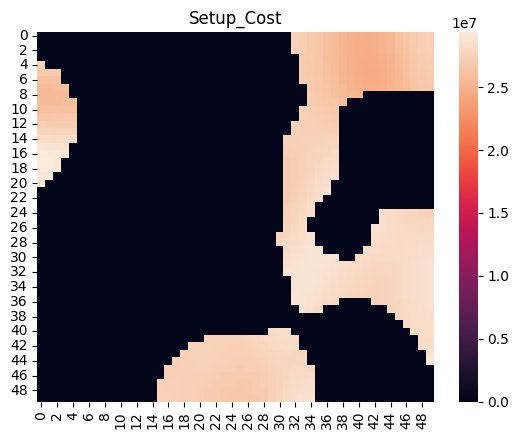

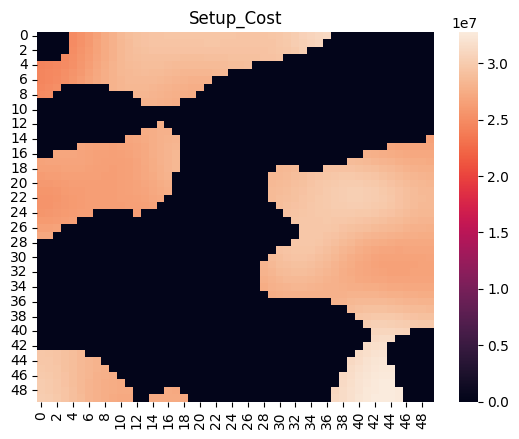

In [25]:
setup_solar=np.zeros(loc)
for i in range(loc):
    setup_cost_solar[i,:,:]=(land_cost[i,:,:]+terrain_solar[i,:,:]*50000000)*availability[i]
    setup_solar[i]=np.sum(setup_cost_solar[i,:,:])
    sns.heatmap(setup_cost_solar[i,:,:])
    plt.title('Setup_Cost')
    plt.show()

In [26]:
setup_solar

array([1.14132636e+10, 1.95469819e+10, 2.20805433e+10, 1.37578353e+10,
       2.27497912e+10, 1.85793673e+10, 2.73450311e+10])

In [27]:
terrain_wind=np.load('wind_terrain_data.npy')
setup_cost_wind=np.zeros((loc,lat,long))

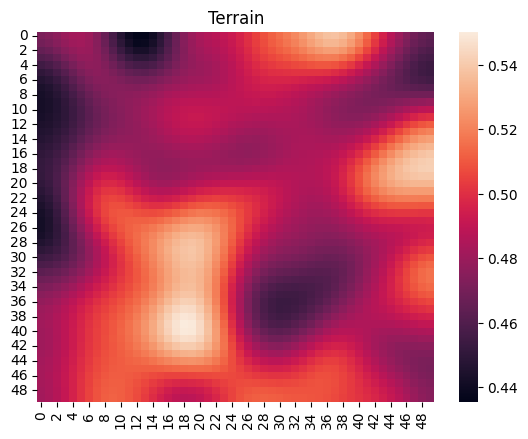

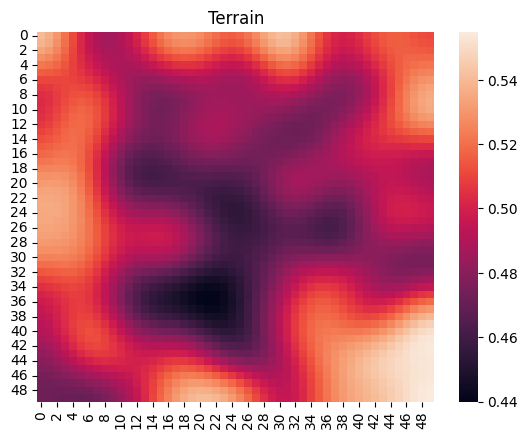

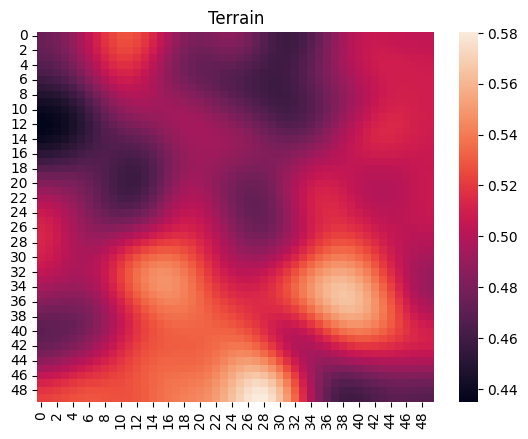

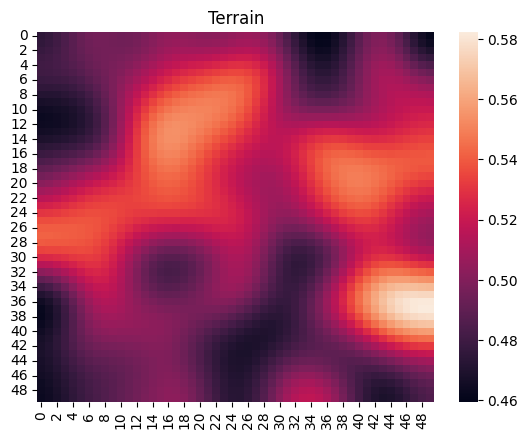

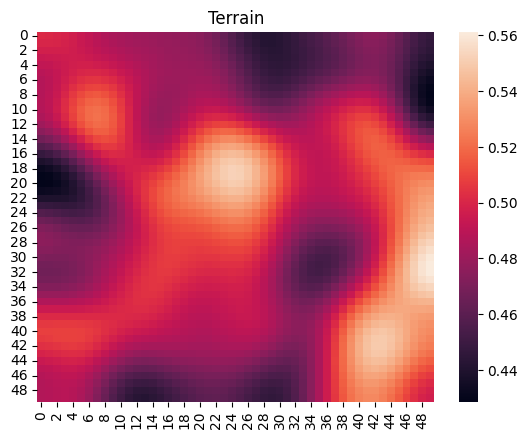

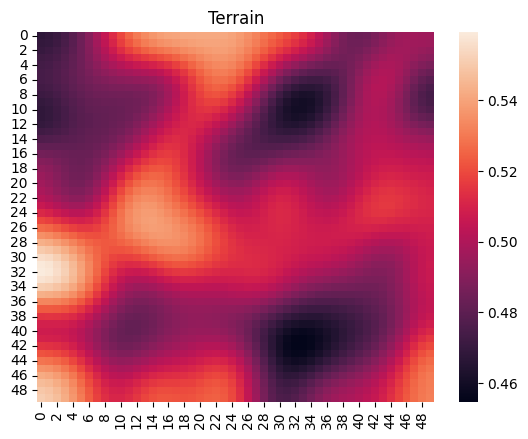

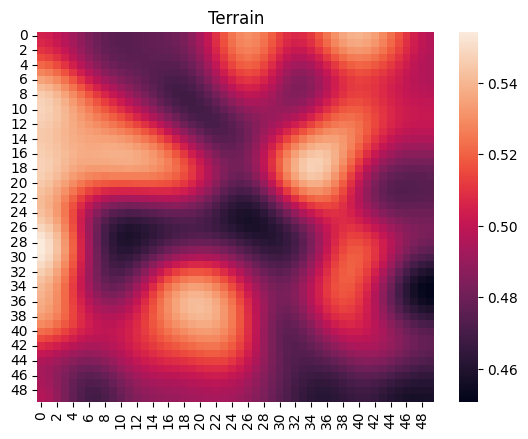

In [28]:
for i in range(loc):
    sns.heatmap(terrain_wind[i,:,:])
    plt.title('Terrain')
    plt.show()

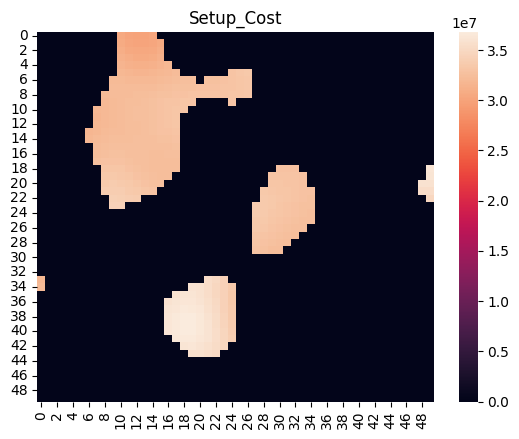

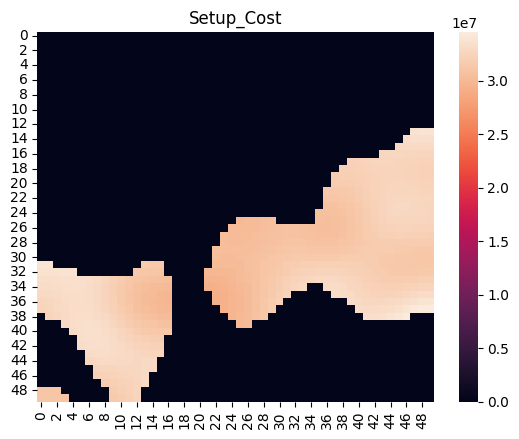

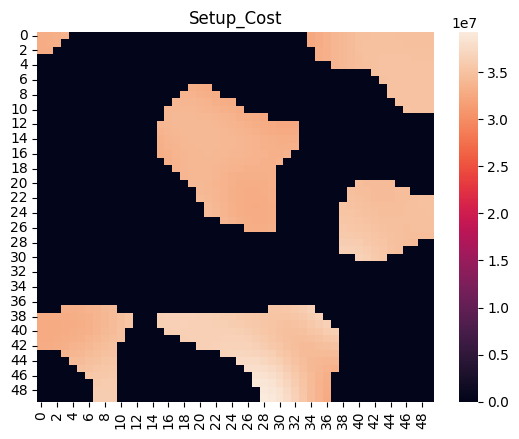

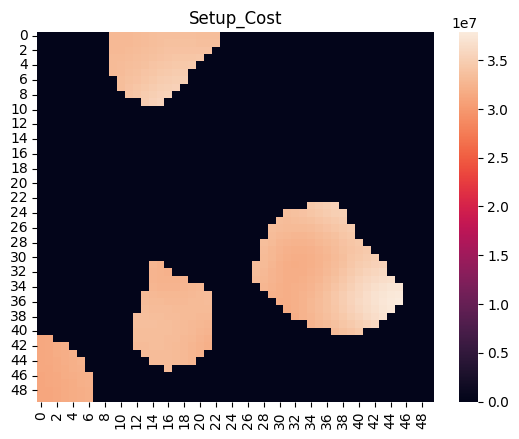

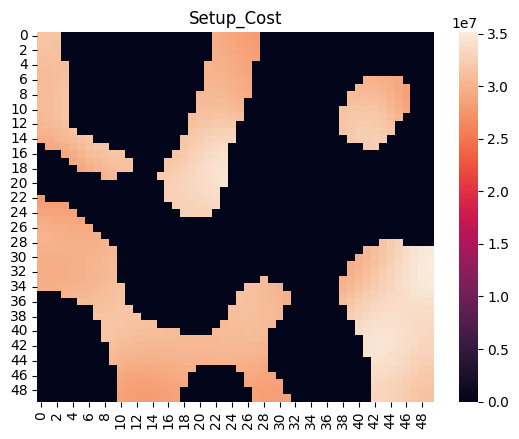

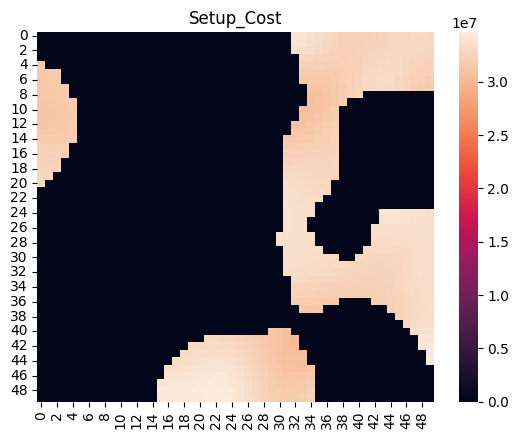

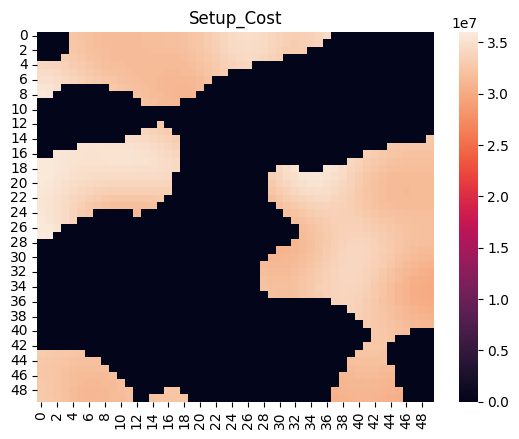

In [29]:
setup_wind=np.zeros(loc)
for i in range(loc):
    setup_cost_wind[i,:,:]=(land_cost[i,:,:]+terrain_wind[i,:,:]*60000000)*availability[i]
    setup_wind[i]=np.sum(setup_cost_wind[i,:,:])
    sns.heatmap(setup_cost_wind[i,:,:])
    plt.title('Setup_Cost')
    plt.show()

In [30]:
setup_wind 

array([1.33130644e+10, 2.18669223e+10, 2.54451813e+10, 1.62736454e+10,
       2.71170200e+10, 2.21850431e+10, 3.16868234e+10])

In [31]:
setup=np.block([[setup_solar.reshape((loc,1)),setup_wind.reshape((loc,1))]])
np.shape(setup)


(7, 2)

In [32]:
import pandas as pd

In [33]:
df=pd.DataFrame(columns=['Area','Solar_cost','Wind_cost'])
df['Area']=area
df['Solar_cost']=setup_solar
df['Wind_cost']=setup_wind
df

,Area,Solar_cost,Wind_cost
0,401.0,1.141326e+10,1.331306e+10
1,686.0,1.954698e+10,2.186692e+10
2,735.0,2.208054e+10,2.544518e+10
3,487.0,1.375784e+10,1.627365e+10
4,869.0,2.274979e+10,2.711702e+10
5,679.0,1.857937e+10,2.218504e+10
6,966.0,2.734503e+10,3.168682e+10


In [34]:
df.to_excel('Test_params.xlsx',index=False)